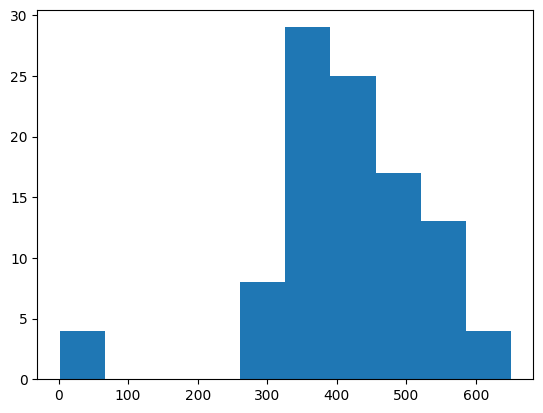

[(0, 460), (1, 580), (2, 580), (3, 430), (4, 380), (5, 440), (6, 640), (7, 530), (8, 340), (9, 360), (10, 4), (11, 400), (12, 430), (13, 480), (14, 390), (15, 380), (16, 580), (17, 450), (18, 400), (19, 440), (20, 350), (21, 650), (22, 370), (23, 390), (24, 470), (25, 480), (26, 580), (27, 540), (28, 290), (29, 370), (30, 410), (31, 530), (32, 390), (33, 330), (34, 400), (35, 290), (36, 470), (37, 410), (38, 360), (39, 430), (40, 370), (41, 450), (42, 420), (43, 390), (44, 320), (45, 380), (46, 510), (47, 480), (48, 430), (49, 450), (50, 4), (51, 400), (52, 470), (53, 570), (54, 410), (55, 390), (56, 550), (57, 530), (58, 460), (59, 330), (60, 5), (61, 550), (62, 430), (63, 330), (64, 400), (65, 320), (66, 480), (67, 390), (68, 490), (69, 310), (70, 350), (71, 520), (72, 590), (73, 440), (74, 360), (75, 380), (76, 570), (77, 360), (78, 370), (79, 360), (80, 290), (81, 490), (82, 480), (83, 410), (84, 370), (85, 2), (86, 280), (87, 440), (88, 380), (89, 450), (90, 390), (91, 550), (92, 

In [57]:
import os
import joblib
import optuna
import statistics
import time
import matplotlib.pyplot as plt

n_parallel = 8
n_files = 100

def objective(trial: optuna.trial.Trial):
    temp_start = trial.suggest_float("temp_start", 0, 1e5)
    temp_end = trial.suggest_float("temp_end", 0, 1e5)
    scores = calc_scores(temp_start, temp_end)
    return statistics.mean(scores)

def calc_scores(temp_start: float, temp_end: float):
    scores = joblib.Parallel(n_jobs = n_parallel)(
        joblib.delayed(calc_score_each)(i, temp_start, temp_end) for i in range(n_files)
    )
    return scores

def calc_score_each(seed: int, temp_start: float, temp_end: float):
    in_file = f"in/testcase_{seed:03}.txt"
    os.makedirs("tools/out", exist_ok=True)
    out_file = f"out/{seed:03}.txt"
    os.system(f"./exe {temp_start} {temp_end} < tools/{in_file} 1> tools/{out_file} 2> /dev/null")
    cmd = f"cd tools && ./judge_exe {in_file} < {out_file} 2> /dev/null"
    out = os.popen(cmd)
    #return int(out.read().split()[-1])
    return (seed, int(out.read().split()[-1]))

os.system("g++ -O2 -std=c++17 main.cpp -o exe -DOPTUNA")
scores = calc_scores(0, 0)
values = [val for seed, val in scores]
plt.hist(values)
plt.show()
print(scores)
print(sum(values))


83568


In [52]:
start_time = time.time()
study = optuna.create_study(
    direction="maximize",
    storage="sqlite:///optuna.db",
    study_name="tune_range",
    load_if_exists=True,
)
study.optimize(objective, n_trials=100)
end_time = time.time()
print(f"100 trials over {n_files} cases takes {end_time - start_time} seconds.")

study = optuna.load_study(storage="sqlite:///ahc000.db", study_name="tune_range")
optuna.visualization.plot_optimization_history(study)

KeyError: 'Record does not exist.'